In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import cm
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from IPython.display import clear_output

from scipy.signal import savgol_filter

plt.rcParams['figure.figsize']=[18,12]

%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
df = pd.read_csv("AvP_400_1000_iq_SOC.csv")
# NDVI = pd.read_csv("NDVI_WP.csv")
# RVI = pd.read_csv("RVI_WP.csv"

In [27]:
df.head(10)

,actual,plsr,lasso,gpr,Unnamed: 4,Unnamed: 5,Unnamed: 6,Regressor,Metric,simple_mean
0,0.482,0.913449,0.943933,1.263736,NaN,NaN,NaN,GPR,RMSE,0.668
1,0.424,0.842489,0.999757,1.561020,NaN,NaN,NaN,GPR,R2,0.336
2,1.390,2.174977,2.049510,2.042768,NaN,NaN,NaN,Lasso,RMSE,0.500
3,2.260,1.742325,1.617800,2.027746,NaN,NaN,NaN,Lasso,R2,0.626
4,2.470,2.900336,2.908334,1.736140,NaN,NaN,NaN,PLSR,RMSE,0.539
5,1.510,1.906383,1.897673,1.960068,NaN,NaN,NaN,PLSR,R2,0.564
6,2.570,2.598469,2.471297,2.110732,NaN,NaN,NaN,NaN,NaN,NaN
7,2.240,1.721698,1.782995,2.079026,NaN,NaN,NaN,NaN,NaN,NaN
8,0.402,0.517891,0.443714,1.014864,NaN,NaN,NaN,NaN,NaN,NaN
9,0.976,0.651949,0.689161,0.877468,NaN,NaN,NaN,NaN,NaN,NaN


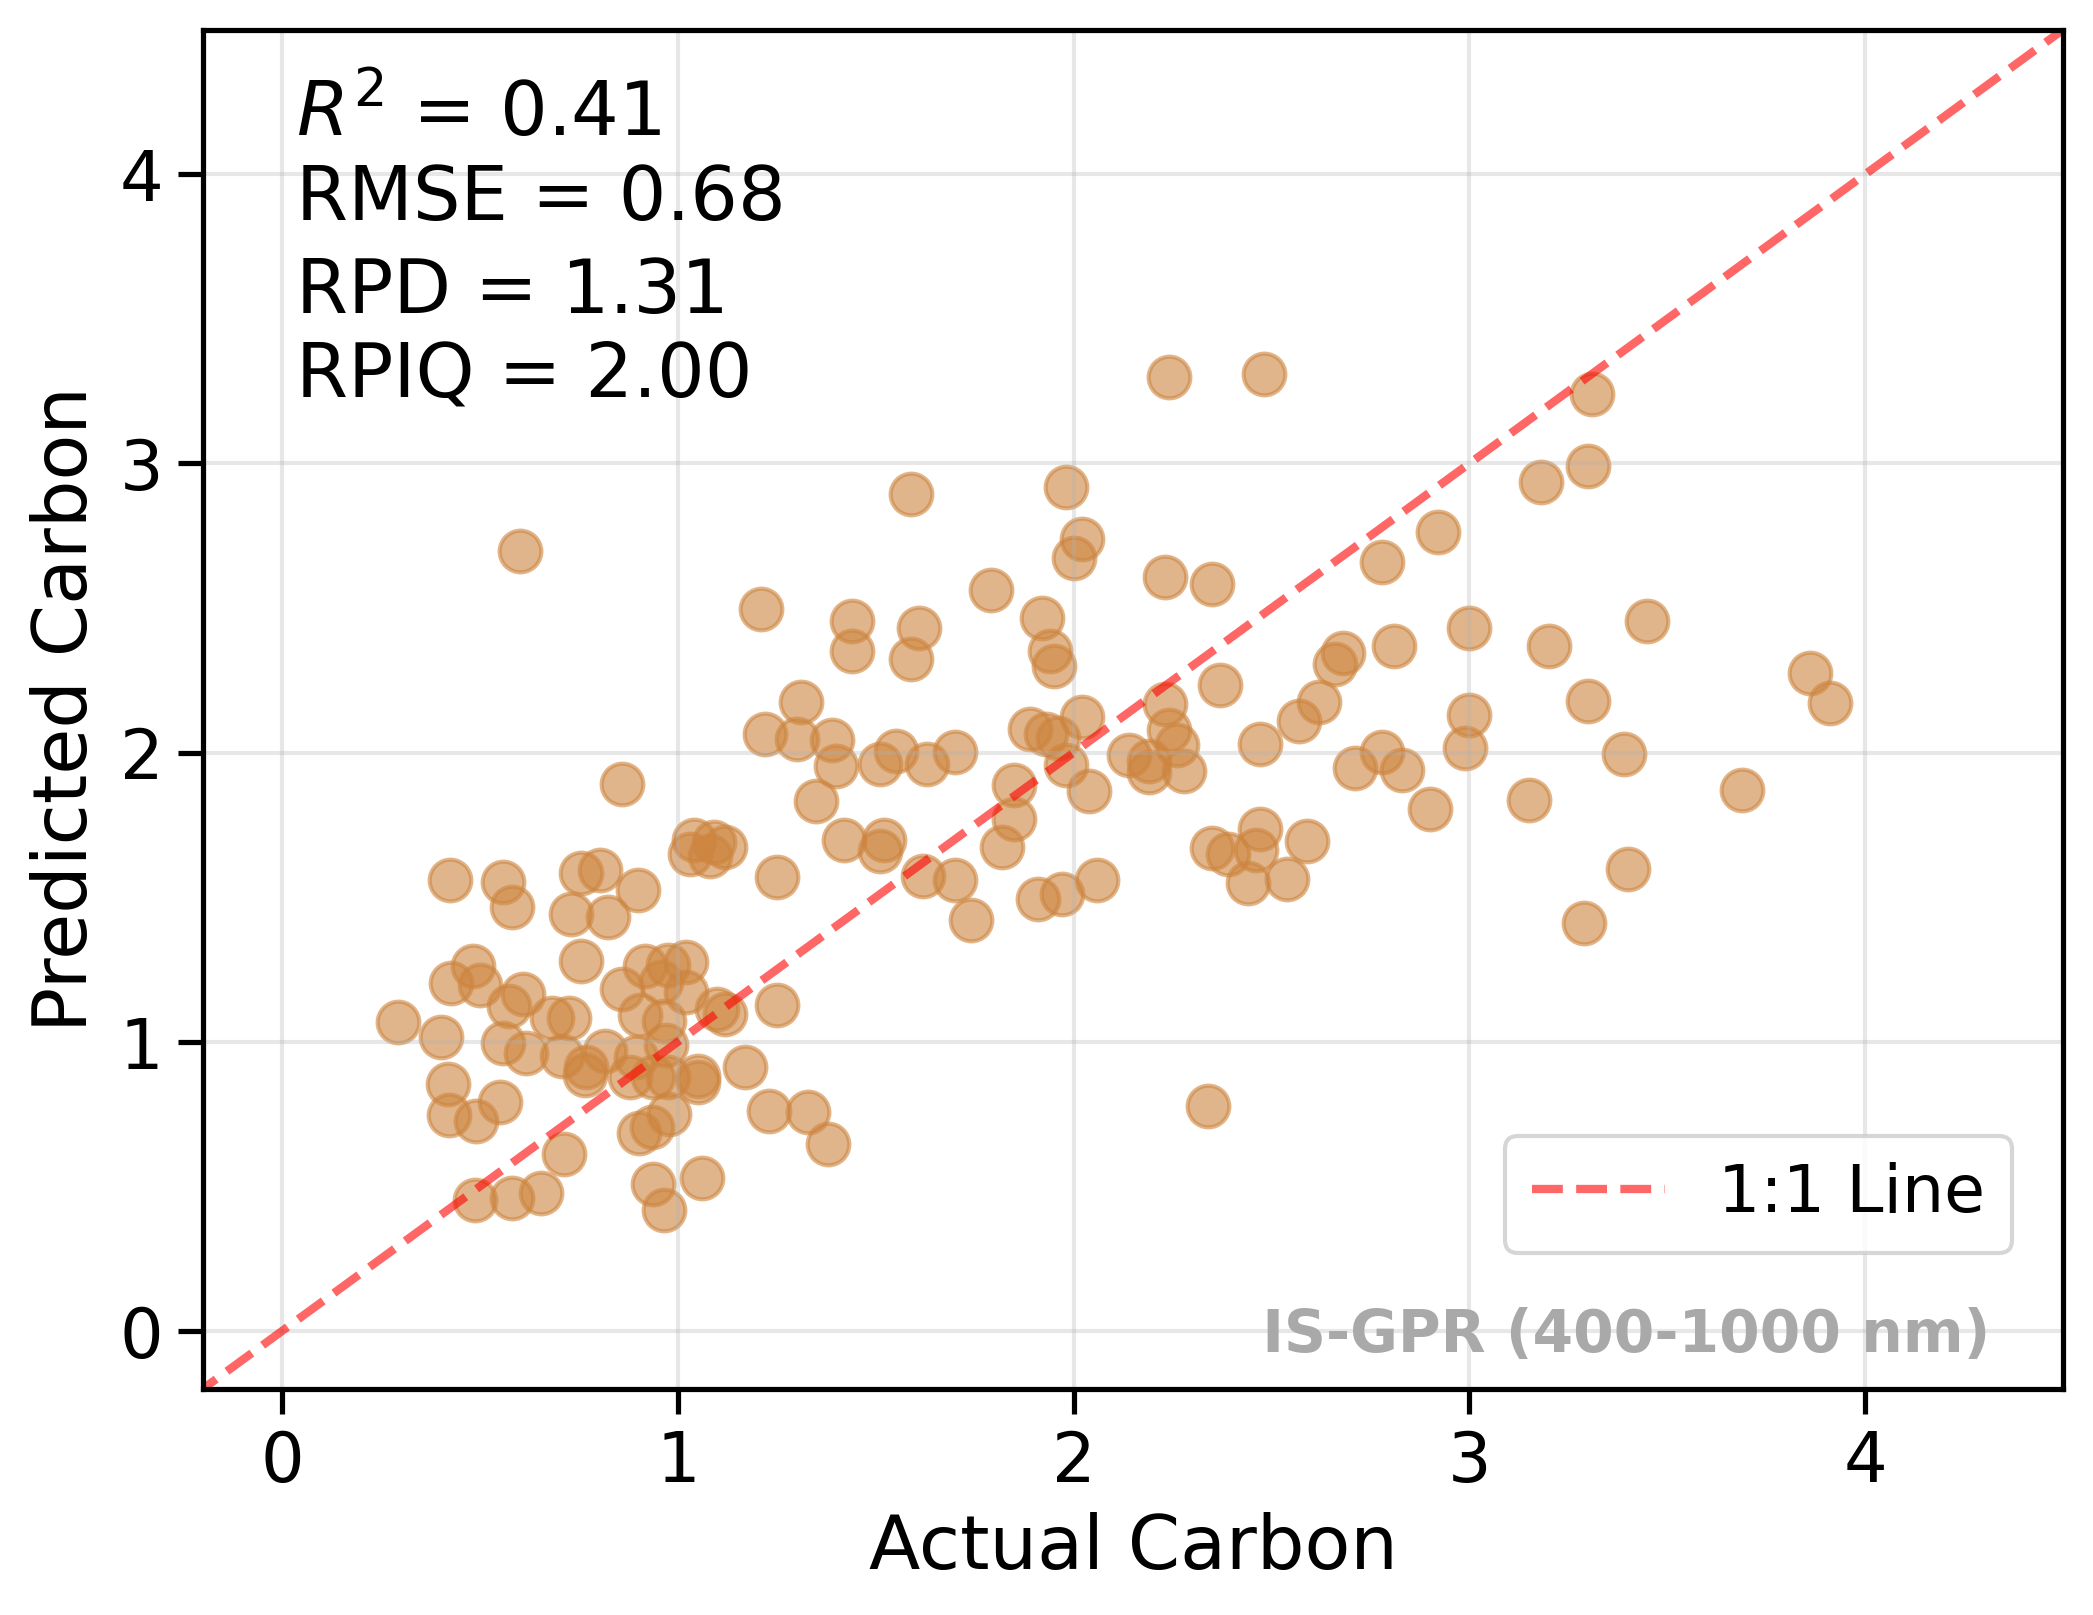

In [32]:
# Assuming the columns are named 'test' and 'predicted'
y_test = df['actual']
y_pred = df['gpr']

sd = y_test.std()
iqr = np.subtract(*np.percentile(y_test, [75, 25]))  # IQR calculation


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rpd = sd / rmse
rpiq = iqr / rmse

# Create a scatter plot
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(y_test, y_pred, color='peru', alpha=0.6, s=100)

# Add the 1:1 line from (0, 0) to (1, 1)
plt.plot([-0.5, 5], [-0.5, 5], color='red', linestyle='--', lw=2, alpha=0.6, label='1:1 Line')


plt.xlabel('Actual Carbon')
plt.ylabel('Predicted Carbon')
#plt.title('Scatter Plot of Actual vs. Predicted Nitrogen Values', fontsize=12)
#plt.text(0.05, 0.9, f'R2 = {r2:.2f}\nRMSE = {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.text(0.05, 0.86, f'$R^2$ = {r2:.2f}\nRMSE = {rmse:.2f}', transform=plt.gca().transAxes, fontsize=18)  # Use LaTeX formatting
plt.text(0.05, 0.73, f'RPD = {rpd:.2f}\nRPIQ = {rpiq:.2f}', transform=plt.gca().transAxes, fontsize=18)  # Adjust the position as needed

# Add text to indicate the model name or any other information
model_name = "IS-GPR (400-1000 nm)"
plt.text(0.76, 0.06, f' {model_name}', transform=plt.gca().transAxes, ha='center', va='top', fontsize=14, fontweight='bold', color= 'darkgrey')


plt.legend(loc = (0.70, 0.1), prop={'size': 16})
plt.grid(True, alpha=0.3)  # Adjust the alpha value for grid lines

plt.xlim(-0.2, 4.5)
plt.ylim(-0.2, 4.5)

plt.show()